In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

In [2]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/regression/dataA.csv'
df = pd.read_csv(url)
df.head()

,x,y,z
0,81.997014,99.017636,a
1,41.724756,73.680872,a
2,26.566336,70.189922,a
3,124.561476,12.295715,a
4,142.729102,46.652237,a


<AxesSubplot:xlabel='x', ylabel='y'>

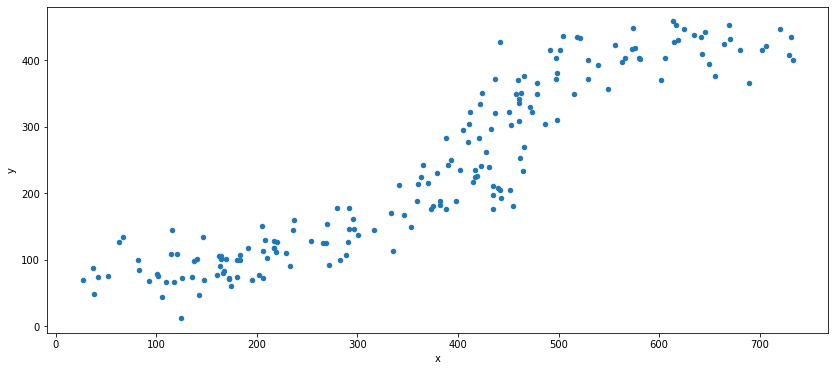

In [4]:
df.plot(kind='scatter', x='x',y='y',figsize=(14,6))

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(df[['x']].values, 
    df.y.values, test_size=.2, random_state=1)

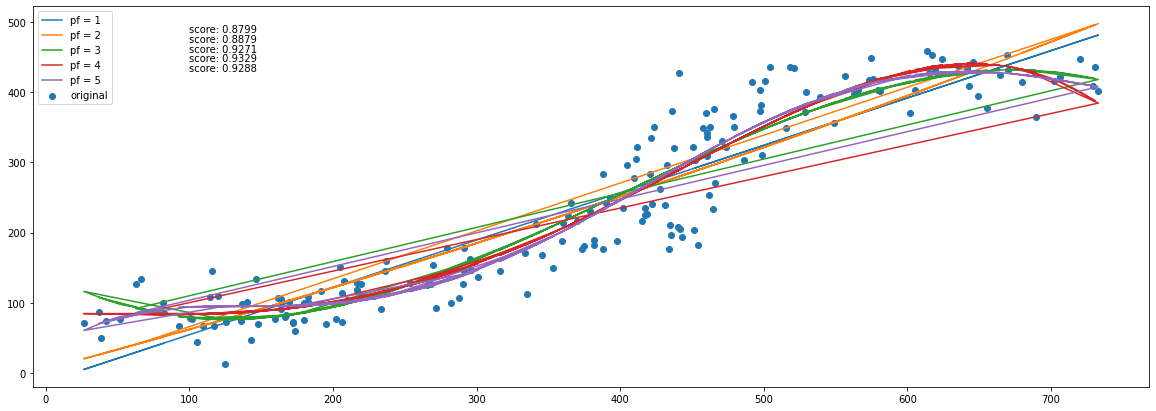

In [49]:
result = []
plt.figure(figsize=(20,7))
for degree in [1,2,3,4,5,]:
    model = make_pipeline(PolynomialFeatures(degree),LinearRegression())
    model.fit(xtrain, ytrain)
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    mae_train = mean_absolute_error(ytrain, ypred_train)
    mae_test = mean_absolute_error(ytest, ypred_test)
    result.append({
        'sno':degree,
        'train_error': mae_train,
        'test_error' : mae_test
    })
    score = r2_score(ytest, ypred_test)
    plt.plot(df['x'], model.predict(df[['x']].values), label=f'pf = {degree}')
    plt.text(100,500-degree*14,f'score: {score:.4f}')
plt.scatter(x=df['x'], y=df['y'],label='original')
plt.legend()
plt.show()

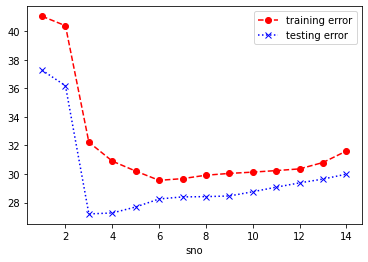

In [31]:
errordf = pd.DataFrame(result)
errordf.set_index('sno',inplace=True)
errordf['train_error'].plot(style='ro--', label='training error')
errordf['test_error'].plot(style='bx:', label = 'testing error')
plt.legend()
plt.show()